In [10]:
from libs.search import *
import matplotlib.pyplot as plt
from PIL import Image
import random
import copy
from typing import List
# mlrose
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

import math

In [11]:

def plot_NQueens(solution, fig = None):
    n = len(solution)
    board = np.array([2 * int((i + j) % 2) for j in range(n) for i in range(n)]).reshape((n, n))
    im = Image.open('images/queen_s.png')
    height = im.size[1]
    # im = im.resize((int(100 / n), int(100 / n)))
    im = np.array(im).astype(float) / 255
    fig = plt.figure(figsize=(7, 7)) if fig is None else fig
    ax = fig.add_subplot(111)
    ax.set_title('{} Queens'.format(n))
    plt.imshow(board, cmap='binary', interpolation='nearest')
    # NQueensCSP gives a solution as a dictionary
    if isinstance(solution, dict):
        for (k, v) in solution.items():
            newax = fig.add_axes([0.064 + (k * 0.112), 0.062 + ((n - v) * 0.112), 0.1, 0.1], zorder=1)
            newax.imshow(im)
            newax.axis('off')
    # NQueensProblem gives a solution as a list
    elif isinstance(solution, list):
        for (k, v) in enumerate(solution):
            l = 7/n
            newax = fig.add_axes([0.064 + (k * 0.896/n),((n - v) * 0.896/n) - 0.5/n + n*0.002, 0.8/n, 0.8/n], zorder=1)
            newax.imshow(im)
            newax.axis('off')
    fig.tight_layout()
    plt.show()
    # return fig
    

# Hill Climbing

C:\Users\SaadS\AppData\Local\Temp\ipykernel_5420\2076050087.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


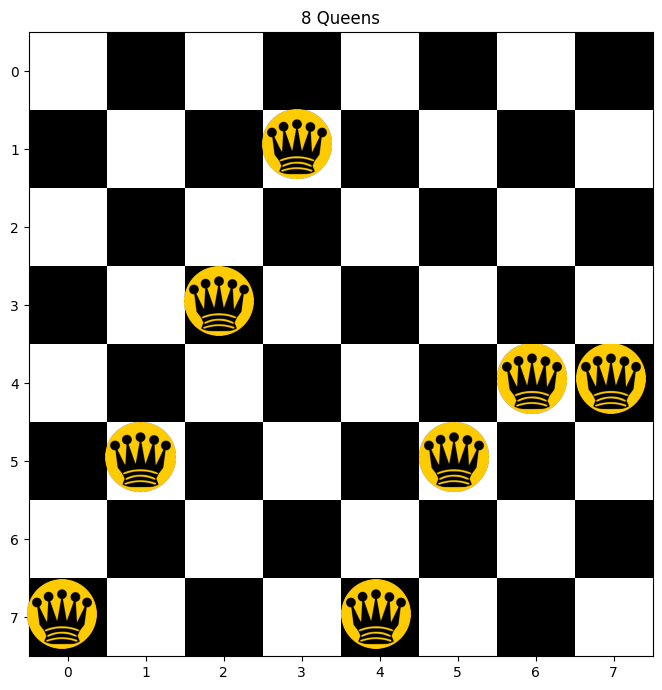

Initial state: [7, 5, 3, 1, 7, 5, 4, 4]
Initial attacks: 6


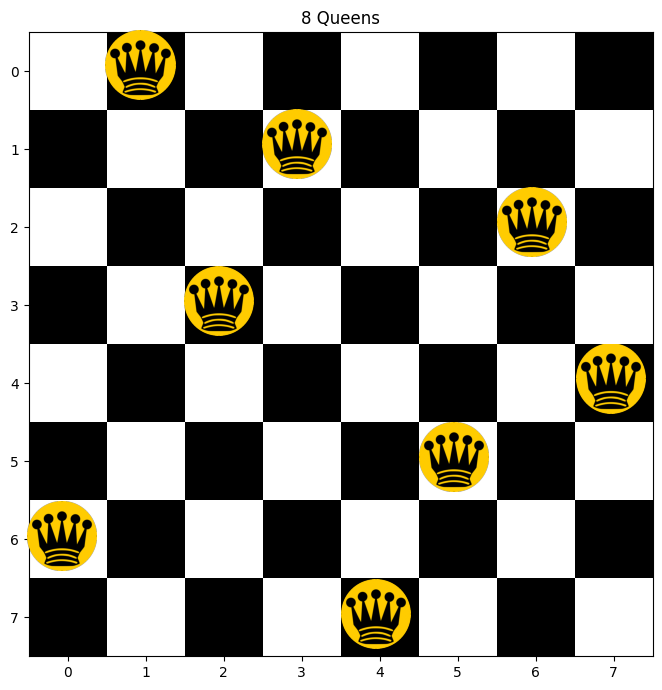

Solution: [6, 0, 3, 1, 7, 5, 2, 4]
Attacks in solution: 1
Time Complexity: 224
Optimality: Plateau


In [12]:
#  Hill Climbing

def numattacks(state):

    attacks = 0
    n = len(state)
    for i in range(n):
        for j in range(i+1, n):
            if state[i] == state[j]:
                attacks += 1
            elif i == j:
                attacks += 1
            elif abs(state[i] - state[j]) == abs(i - j):
                attacks += 1
    return attacks


def generatesuccessors(state):
    successors = []
    n = len(state)
    for rowind, row in enumerate(state):
        for newcol in range(n):  
            if newcol != row:  
                successorstate = state[:]  
                successorstate[rowind] = newcol  
                successors.append(successorstate)
    return successors

def hillclimbing(initialstate):
    currentstate = initialstate
    currentattacks = numattacks(currentstate)
    iterations = 0
    nodesgenerated = 0  
    status = "Unknown"
    
    while True:
        successors = generatesuccessors(currentstate)
        nodesgenerated += len(successors)  
        bestsuccessor = min(successors, key=numattacks)  
        newattacks = numattacks(bestsuccessor)
        
        if newattacks >= currentattacks:  
            if newattacks == currentattacks:
                status = "Plateau"
            else:
                status = "Local Minimum"
            break
        currentstate = bestsuccessor
        currentattacks = newattacks
       
    if status == "Unknown" or currentattacks==0:  
       status = "Global Minimum"
   
    return currentstate, nodesgenerated,status



# Set a specific seed value for reproducibility
SEED_VALUE = 4500
random.seed(SEED_VALUE)

initialstate = [random.randint(0, 7) for _ in range(8)]

nqp = NQueensProblem(len(initialstate))
plot_NQueens(initialstate)
print("Initial state:", initialstate)
print("Initial attacks:", numattacks(initialstate))

solution,timecomplexity,status= hillclimbing(initialstate)
plot_NQueens(solution)
print("Solution:", solution)
print("Attacks in solution:", numattacks(solution))
print("Time Complexity:", timecomplexity)
print("Optimality:", status)




# Stochastic Hill Climbing

C:\Users\SaadS\AppData\Local\Temp\ipykernel_5420\2076050087.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


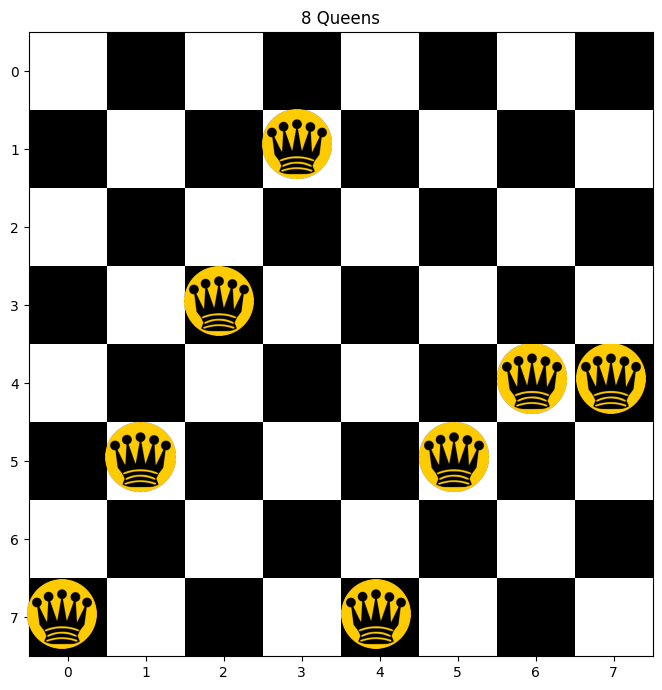

Initial state: [7, 5, 3, 1, 7, 5, 4, 4]
Initial attacks: 6


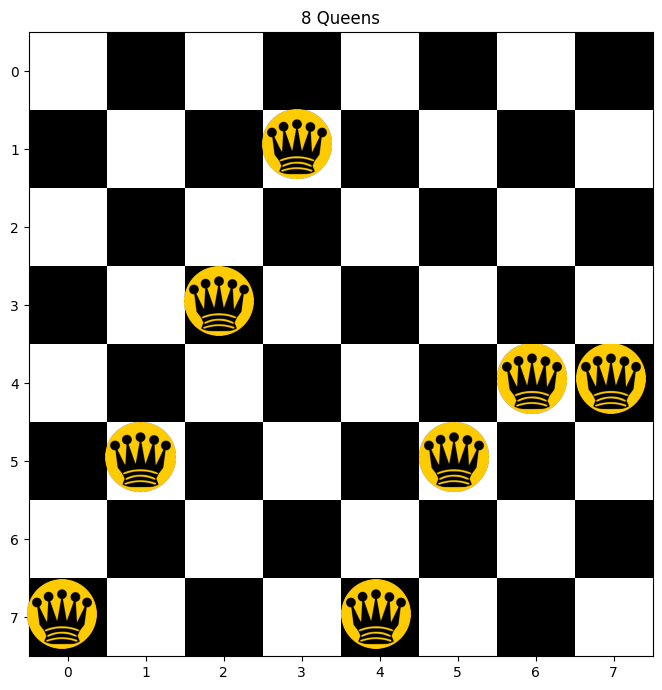

Solution: [7, 5, 3, 1, 7, 5, 4, 4]
Attacks in solution: 6
Time Complexity: 1
Optimality: Plateau


In [13]:
# Stochastic hill climbing
def numattacks(state):

    attacks = 0
    n = len(state)
    for i in range(n):
        for j in range(i+1, n):
            if state[i] == state[j]:
                attacks += 1
            elif i == j:
                attacks += 1
            elif abs(state[i] - state[j]) == abs(i - j):
                attacks += 1
    return attacks


def randomsuccessor(state):
    new_state = copy.deepcopy(state)
    queen_col = random.randint(0, len(state) - 1)
    queen_row = state[queen_col]
    new_row = random.randint(0, len(state) - 1)
    new_state[queen_col] = new_row
    return new_state
    
   
def stochastichillclimbing(initialstate):

    currentstate = initialstate
    currentattacks = numattacks(currentstate)
    iterations = 0
    while True:
        iterations += 1  
        
        newstate = randomsuccessor(currentstate)
        newattacks = numattacks(newstate)
        
        if newattacks >= currentattacks: 
            if newattacks == currentattacks:
                status = "Plateau"
            else:
                status = "Local Minimum"
            break
        
        currentstate = newstate
        currentattacks = newattacks
   
    if currentattacks == 0: 
        status = "Global Minimum"

    return currentstate, iterations, status



# Set a specific seed value for reproducibility
SEED_VALUE = 4500
random.seed(SEED_VALUE)

initialstate = [random.randint(0, 7) for _ in range(8)]

nqp = NQueensProblem(len(initialstate))
plot_NQueens(initialstate)
print("Initial state:", initialstate)
print("Initial attacks:", numattacks(initialstate))
random.seed()
solution,timecomplexity,status= stochastichillclimbing(initialstate)
plot_NQueens(solution)
print("Solution:", solution)
print("Attacks in solution:", numattacks(solution))
print("Time Complexity:", timecomplexity)
print("Optimality:", status)






# Simulated Annealing

C:\Users\SaadS\AppData\Local\Temp\ipykernel_5420\2076050087.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


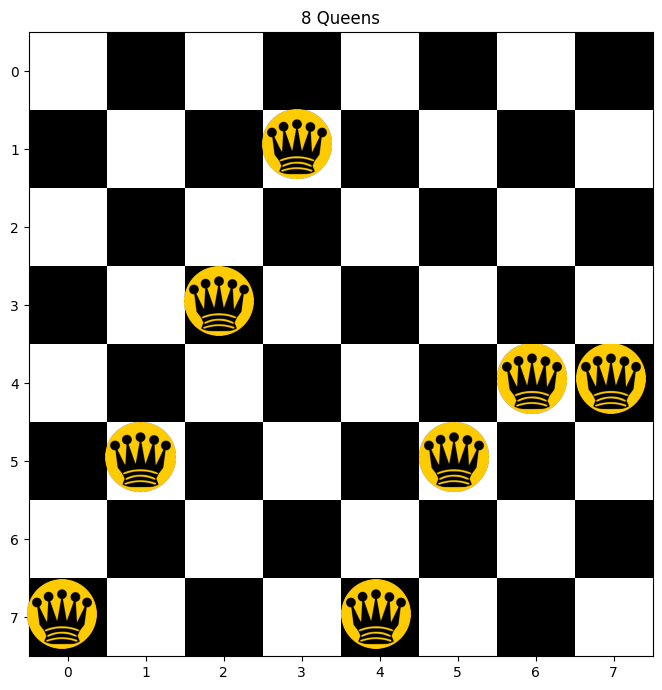

Initial state: [7, 5, 3, 1, 7, 5, 4, 4]
Initial attacks: 6


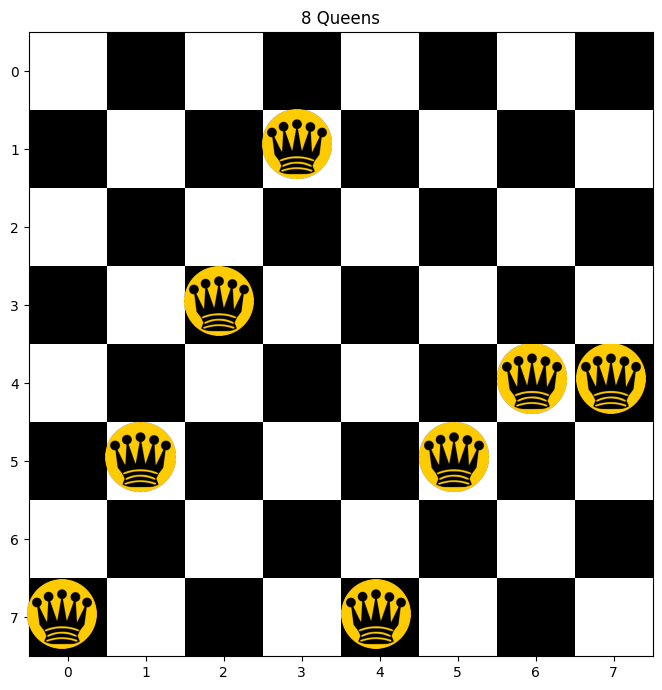

Solution: [7, 5, 3, 1, 7, 5, 4, 4]
Attacks in solution: 6
Time Complexity: 1
Optimality: Plateau


In [14]:
# Simulated annealing
def numattacks(state):
    attacks = 0
    n = len(state)
    for i in range(n):
        for j in range(i+1, n):
            if state[i] == state[j]:
                attacks += 1
            elif i == j:
                attacks += 1
            elif abs(state[i] - state[j]) == abs(i - j):
                attacks += 1
    return attacks

def randomsuccessor(state):
    new_state = copy.deepcopy(state)
    queen_col = random.randint(0, len(state) - 1)
    queen_row = state[queen_col]
    new_row = random.randint(0, len(state) - 1)
    new_state[queen_col] = new_row
    return new_state
    

def acceptanceprobability(oldattacks, newattacks, temperature):
    delta_E = newattacks - oldattacks
    if delta_E <= 0:
        return 1.0  # Always accept if new state has lower energy
    else:
        return math.exp(-delta_E / temperature)


def simulatedannealing(initialstate, schedule):
    currentstate = initialstate
    currentattacks = numattacks(currentstate)
    temperature = schedule.init_temp
    mintemp = schedule.min_temp
    expconst = schedule.exp_const

    t = 0  
    while temperature > mintemp:
        newstate = randomsuccessor(currentstate)
        newattacks = numattacks(newstate)

        ap = acceptanceprobability(currentattacks, newattacks, temperature)
        if ap > random.uniform(0, 1):  
            currentstate = newstate
            currentattacks = newattacks
        
        temperature = expconst * temperature  
        t += 1 
    status = "Unknown"
    if currentattacks == 0:
        status = "Global Minimum"
    elif newattacks >= currentattacks:
        if newattacks == currentattacks:
            status = "Plateau"
        else:
            status = "Local Minimum"
    return currentstate, t,status





# Set a specific seed value for reproducibility
SEED_VALUE = 4500
random.seed(SEED_VALUE)

initialstate = [random.randint(0, 7) for _ in range(8)]

nqp = NQueensProblem(len(initialstate))
plot_NQueens(initialstate)
print("Initial state:", initialstate)
print("Initial attacks:", numattacks(initialstate))
random.seed()

schedule = mlrose.ExpDecay(init_temp=10, exp_const=0.05, min_temp=1)
# schedule = mlrose.ExpDecay(init_temp=10000, exp_const=0.95, min_temp=0.001) This will give global minimum mostly

solution,timecomplexity,status = simulatedannealing(initialstate, schedule)
plot_NQueens(solution)
print("Solution:", solution)
print("Attacks in solution:", numattacks(solution))
print("Time Complexity:", timecomplexity)
print("Optimality:", status)

